<a href="https://colab.research.google.com/github/brunokobi/Bootcamp_BairesDev/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Desafio 3: Cálculo de Métricas de Avaliação de Aprendizado

## 📝 Descrição do Desafio
Neste projeto, você irá calcular as principais métricas utilizadas para avaliar modelos de classificação de dados, com o objetivo de aplicar essas métricas a um modelo treinado no dataset Breast Cancer. Este dataset é amplamente utilizado em aprendizado de máquina e contém 569 amostras de tumores de mama, classificados em duas classes: maligno e benigno, com 30 características de medidas relacionadas a propriedades das células do tumor.
 As métricas incluem:  
- **Acurácia**  
- **Sensibilidade (Recall)**  
- **Especificidade**  
- **Precisão**  
- **F-score**  

Para implementar as funções de cálculo, utilize os métodos e fórmulas correspondentes apresentadas na **Tabela 1**.

### 🟢 Matriz de Confusão  
Os valores de VP (Verdadeiros Positivos), VN (Verdadeiros Negativos), FP (Falsos Positivos) e FN (Falsos Negativos) serão necessários para os cálculos. Você pode escolher arbitrariamente uma matriz de confusão, já que o objetivo principal é compreender o funcionamento das métricas.

---

## 📋 Tabela 1: Fórmulas das Métricas de Avaliação  
| Métrica           | Fórmula                                               | Descrição                             |
|--------------------|-------------------------------------------------------|---------------------------------------|
| **Acurácia**       | \((VP + VN) / (VP + VN + FP + FN)\)                   | Proporção de previsões corretas       |
| **Precisão (P)**   | \(VP / (VP + FP)\)                                    | Porcentagem de positivos corretos     |
| **Sensibilidade (S)** | \(VP / (VP + FN)\)                                 | Habilidade de identificar positivos   |
| **Especificidade** | \(VN / (VN + FP)\)                                    | Habilidade de identificar negativos   |
| **F-score**        | \(2 \cdot (P \cdot S) / (P + S)\)                     | Média harmônica de Precisão e Recall  |

> **Legenda:**  
> - **VP:** Verdadeiros Positivos  
> - **VN:** Verdadeiros Negativos  
> - **FP:** Falsos Positivos  
> - **FN:** Falsos Negativos  

---

⚡ **Dica**: Entender e implementar as métricas será essencial para avaliar a eficácia de modelos de classificação e tomar decisões com base nos resultados obtidos.

🚀 Mãos à obra!


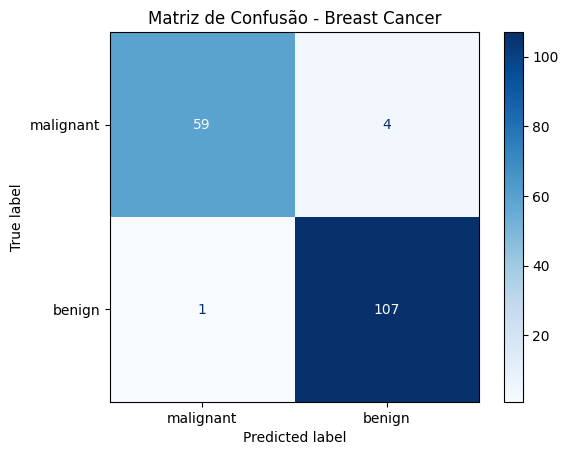

Classe,Acurácia,Precisão,Recall,Especificidade,F-score
malignant,0.970760,0.983333,0.936508,0.990741,0.959350
benign,0.970760,0.963964,0.990741,0.936508,0.977169


In [2]:
# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carregando o dataset Breast Cancer
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um modelo de classificação (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Breast Cancer")
plt.show()

# Função para calcular as métricas
def calculate_metrics(conf_matrix, target_names):
    metrics = []
    for i in range(conf_matrix.shape[0]):
        VP = conf_matrix[i, i]
        FN = sum(conf_matrix[i, :]) - VP
        FP = sum(conf_matrix[:, i]) - VP
        VN = conf_matrix.sum() - (VP + FN + FP)

        accuracy = (VP + VN) / (VP + VN + FP + FN)
        precision = VP / (VP + FP) if (VP + FP) > 0 else 0
        recall = VP / (VP + FN) if (VP + FN) > 0 else 0
        specificity = VN / (VN + FP) if (VN + FP) > 0 else 0
        f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics.append({
            "Classe": target_names[i],
            "Acurácia": accuracy,
            "Precisão": precision,
            "Recall": recall,
            "Especificidade": specificity,
            "F-score": f_score
        })
    return metrics

# Calculando as métricas para cada classe
metrics_per_class = calculate_metrics(conf_matrix, breast_cancer.target_names)

# Exibindo as métricas como uma tabela com bordas e cor de fonte preta no cabeçalho
df_metrics = pd.DataFrame(metrics_per_class)
styled_table = df_metrics.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black'),
                                 ('background-color', '#f2f2f2'),
                                 ('color', 'black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
).hide(axis="index")  # Ocultar índice da tabela

# Exibir tabela formatada
styled_table
